In [25]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

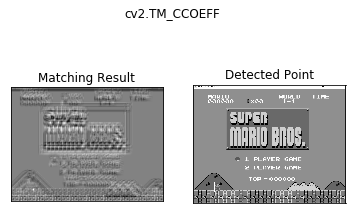

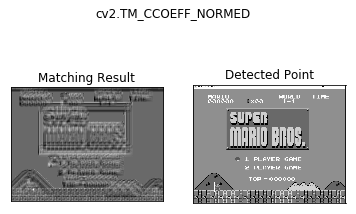

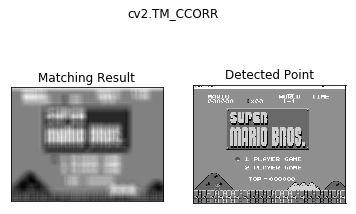

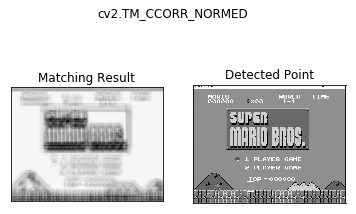

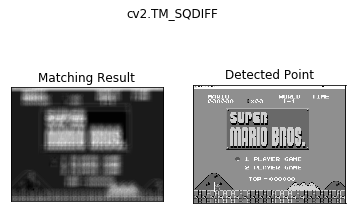

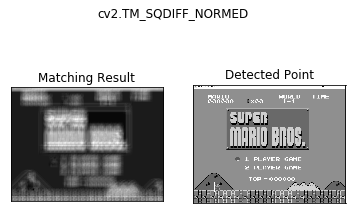

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('screens/screen5.jpg',0)
img2 = img.copy()
template = cv2.imread('templates/small_mario.jpg',0)
w, h = template.shape[::-1]

# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)

    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv2.rectangle(img,top_left, bottom_right, 255, 2)

    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)

    plt.show()

In [36]:
# Ref: https://stackoverflow.com/questions/51705020/opencv-template-matching-true-false
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('screens/screen'+str(1)+'.jpg',0)
img2 = img.copy()
templates = ['mario2.jpg', 'mouse.jpg', 'duck.jpg']
# templates = ['mario2.jpg']


    # All the 6 methods for comparison in a list
for i in range(1,12):
#         print(meth)
    img = cv2.imread('screens/screen'+str(i)+'.jpg',0)
    img2 = img.copy()
    img = img2.copy()
    for item in templates:
        template = cv2.imread('templates/'+ item,0)
        w, h = template.shape[::-1]

        # Apply template Matching
        res = cv2.matchTemplate(img,template,cv2.TM_SQDIFF_NORMED)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
        if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
            top_left = min_loc
        else:
            top_left = max_loc
        bottom_right = (top_left[0] + w, top_left[1] + h)

        cv2.rectangle(img,top_left, bottom_right, 255, 2)

    plt.imsave('screens/results/screen'+str(i)+'_'+meth+'.jpg', img)


C:\Users\gurjaspal\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\gurjaspal\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\gurjaspal\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


uint8
(40, 30)
uint8
(40, 30)
uint8
(40, 30)
uint8
(40, 30)
uint8
(40, 30)
uint8
(40, 30)
uint8
(40, 30)
uint8
(40, 30)
uint8
(40, 30)
uint8
(40, 30)
uint8
(40, 30)


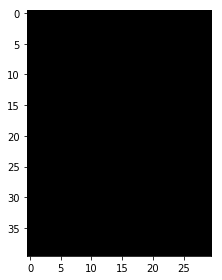

In [42]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.transform import rescale

# img = cv2.imread('screens/screen'+str(1)+'.jpg',0)
# img2 = img.copy()
# template = cv2.imread('templates/small_mario.jpg',0)
# import cv2
# import skimage.io as io
# img = io.imread('templates/mario_bros.png')
# # print(img.shape)
# io.imshow(img)
# cropped = img[32:32+16,178:178+12]
for i in range(1,12):
    img_rgb = cv2.imread('screens/screen'+str(i)+'.jpg')
    img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
    template = cv2.imread('templates/mario_bros.png', 0)
    template = template[32:32+16,178:178+12]
    template = rescale(template, 2.5).astype('uint8')
    print(template.dtype)
#     template = cropped
    print(template.shape)
    io.imshow(template)
    w, h = template.shape[::-1]

    res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
    threshold = 0.9
    loc = np.where( res >= threshold)
    for pt in zip(*loc[::-1]):
        cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

    cv2.imwrite('screens/results/small_mario/screen'+str(i)+'.png',img_rgb)

In [10]:
from skimage.feature import match_template
import skimage.io as io
img = io.imread('templates/mario_bros.png')

template = io.imread('templates/mario_bros.png')
template = template[32:32+16,178:178+12]
result = match_template(img, template)

import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.feature import match_template


image = io.imread('templates/mario_bros.png')
template = io.imread('templates/mario_bros.png')
coin = template[170:220, 75:130]

result = match_template(image, coin)
ij = np.unravel_index(np.argmax(result), result.shape)
x, y = ij[::-1]

fig = plt.figure(figsize=(8, 3))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3, sharex=ax2, sharey=ax2)

ax1.imshow(coin, cmap=plt.cm.gray)
ax1.set_axis_off()
ax1.set_title('template')

ax2.imshow(image, cmap=plt.cm.gray)
ax2.set_axis_off()
ax2.set_title('image')
# highlight matched region
hcoin, wcoin = coin.shape
rect = plt.Rectangle((x, y), wcoin, hcoin, edgecolor='r', facecolor='none')
ax2.add_patch(rect)

ax3.imshow(result)
ax3.set_axis_off()
ax3.set_title('`match_template`\nresult')
# highlight matched region
ax3.autoscale(False)
ax3.plot(x, y, 'o', markeredgecolor='r', markerfacecolor='none', markersize=10)

plt.show()


ValueError: too many values to unpack (expected 2)

(528, 384, 4)
(16, 12, 4)


C:\Users\gurjaspal\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\gurjaspal\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


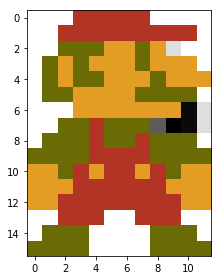

In [19]:
import cv2
import skimage.io as io
img = io.imread('templates/mario_bros.png')
print(img.shape)
io.imshow(img)
cropped = img[32:32+16,178:178+12]
print(cropped.shape)
# cv2.waitKey()

In [17]:
from PIL import Image
im = Image.open('templates/mario_bros.png')
im = im.crop((0, 0, 32, 16))
im.show()

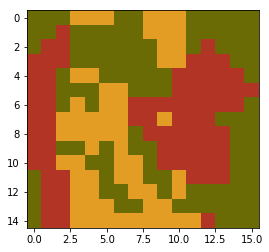

In [6]:
import pygame
import matplotlib.pyplot as plt
screen_width = 1280
screen_height = 720

# pygame.init()
# screen = pygame.display.set_mode((screen_width,screen_height))

sheet = pygame.image.load('templates/mario_bros.png')
single_image = sheet.subsurface((80, 32, 15, 16))
imgdata = pygame.surfarray.array3d(single_image)
plt.imshow(imgdata)

In [37]:
  def get_image(x, y, width, height):
        """Extracts image from sprite sheet"""
        image = pygame.Surface([width, height])
        rect = image.get_rect()

        image.blit(self.sprite_sheet, (0, 0), (x, y, width, height))
        image.set_colorkey(c.BLACK)
        image = pg.transform.scale(image,
                                   (int(rect.width*c.SIZE_MULTIPLIER),
                                    int(rect.height*c.SIZE_MULTIPLIER)))
        return image

In [38]:
img = get_image(178, 32, 16,12)

TypeError: argument 1 must be pygame.Surface, not str